In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
# Загрузка датасета CIFAR-10
dataset_name = 'cifar10'
(train_dataset, test_dataset), dataset_info = tfds.load(
    name=dataset_name,            # Имя датасета
    split=['train', 'test'],      # Разделение данных на тренировочные и тестовые
    shuffle_files=True,           # Перемешивание файлов
    with_info=True,               # Получение дополнительной информации о датасете
    as_supervised=True            # Возврат данных в формате (изображение, метка)
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.4ELQ8J_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.4ELQ8J_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


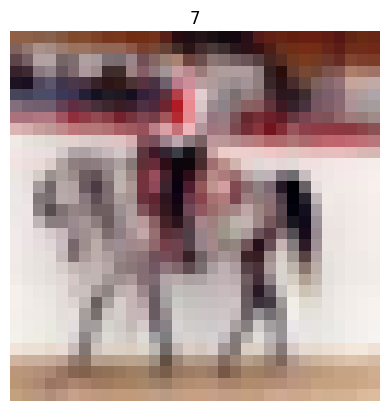

In [ ]:
# Получение одного изображения и метки из тренировочного набора
image, label = next(iter(train_dataset.take(1)))

# Визуализация изображения
plt.imshow(image)                 # Отображение изображения
plt.title(label.numpy())          # Название — числовая метка класса
plt.axis('off')                   # Убрать оси
plt.show()

In [ ]:
# Получение количества классов в датасете
num_classes = dataset_info.features['label'].num_classes  # Количество классов
num_classes

10

In [ ]:
# Предобработка данных
def preprocess_data(image, label):
    # Преобразование изображения в формат float32 и нормализация значений пикселей
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [ ]:
# Применение предобработки к тренировочному и тестовому наборам данных
train_dataset = train_dataset.map(preprocess_data)  # Обработка тренировочных данных
test_dataset = test_dataset.map(preprocess_data)    # Обработка тестовых данных

In [ ]:
# Шаг 3: Создание модели
input_dim = (32, 32, 3)  # Размерность входных данных: 32x32 изображения с 3 каналами

model = tf.keras.models.Sequential([  # Последовательная модель
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_dim),  # Свёрточный слой с 32 фильтрами
    tf.keras.layers.MaxPooling2D((2, 2)),  # Пулинг-слой для уменьшения размерности
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Свёрточный слой с 64 фильтрами
    tf.keras.layers.MaxPooling2D((2, 2)),  # Пулинг-слой
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Ещё один свёрточный слой
    tf.keras.layers.Flatten(),  # Преобразование данных в плоский вектор
    tf.keras.layers.Dense(64, activation='relu'),  # Полносвязный слой с 64 нейронами
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Выходной слой для классификации на num_classes
])

# Вывод структуры модели
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Компиляция модели
model.compile(
    optimizer='adam',  # Оптимизатор Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Функция потерь
    metrics=['accuracy']  # Метрика для отслеживания точности
)

In [ ]:
# Параметры обучения
batch_size = 128  # Размер батча
num_epochs = 10   # Количество эпох обучения

# Создание батчей для тренировочного и тестового наборов данных
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)  # Пакетная обработка + предварительная выборка
test_dataset = test_dataset.batch(batch_size)  # Пакетная обработка

# Обучение модели
model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.2701 - loss: 1.9554 - val_accuracy: 0.4767 - val_loss: 1.4466
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5046 - loss: 1.3809 - val_accuracy: 0.5392 - val_loss: 1.2932
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5669 - loss: 1.2237 - val_accuracy: 0.5788 - val_loss: 1.1803
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6076 - loss: 1.1126 - val_accuracy: 0.6111 - val_loss: 1.0925
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6391 - loss: 1.0299 - val_accuracy: 0.6375 - val_loss: 1.0179
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6634 - loss: 0.9635 - val_accuracy: 0.6609 - val_loss: 0.9667
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6811 - loss: 0.9121 - val_accuracy: 0.6710 - val_loss: 0.9378
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6981 - loss: 0.8659 - val_accuracy: 0.6819 - 

In [ ]:
# Оценка модели на тестовом наборе данных
loss, accuracy = model.evaluate(test_dataset)
print("Test loss:", loss)        # Потери на тестовых данных
print("Test accuracy:", accuracy)  # Точность на тестовых данных

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6918 - loss: 0.8851
Test loss: 0.8960759043693542
Test accuracy: 0.6859999895095825
